<a href="https://colab.research.google.com/github/NaderJS/hacknotebooks/blob/master/machathon_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
from catboost import Pool
import numpy as np 
from catboost import CatBoostRegressor
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import ast
from sklearn.preprocessing import LabelEncoder
import json

from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split


In [0]:
!pip install  bayesian-optimization
# !pip install catboost

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.0.1-cp36-none-any.whl size=10031 sha256=e04a423da0c9373c561c3c85c56ffb804e8d06928f06929e3acfd40a9a90b155
  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


In [0]:
traindata = pd.read_csv("./train.csv")

In [0]:
traindata.head()

,user_uuid,restaurant_uuid,discounted,area,cuisine,restaurant_features,Ratings
0,ae9a2bf4d42c67aed92df769580c0f3f30c9b823,4e8c86cfdb5034d208be316e876e885e0effa536,1,Sheikh Zayed,['Egyptian' 'Oriental' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Khorogat ...,1.0
1,c67a6eda67d18898729657a6c53fb21f01961fea,a23dd99b58683694a104fa68ccd08dffeb811556,0,New Cairo,['Egyptian' 'Koshary'],['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats'],5.0
2,7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09,fc508f4360b4a509edf10fe53d01d0d96ed7dbfc,0,Sheikh Zayed,['Egyptian' 'Grill'],['No Smoking Area' 'Casual Dining'],1.0
3,c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b,8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec,0,Nasr City,['Pizza' 'Egyptian'],['Outdoor' '24 hrs'],3.0
4,23ce012715a4cf5bfed7f0821e461f1593f47027,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Mohandessin,['Egyptian' 'Fast Food'],['No Smoking Area'],5.0


In [0]:
traindata.shape

(64150, 7)

In [0]:
len(traindata.area.value_counts())

44

In [0]:
for i in ast.literal_eval(traindata.cuisine[0]):
    print(i)


EgyptianOrientalFast Food


In [0]:
traindata.eq(0).sum()

user_uuid                  0
restaurant_uuid            0
discounted             49000
area                       0
cuisine                    0
restaurant_features        0
Ratings                    0
dtype: int64

In [0]:
(traindata.cuisine[1])

['[',
 "'",
 'E',
 'g',
 'y',
 'p',
 't',
 'i',
 'a',
 'n',
 "'",
 ' ',
 "'",
 'K',
 'o',
 's',
 'h',
 'a',
 'r',
 'y',
 "'",
 ']']

In [0]:
traindata.area.value_counts()

Maadi                        10946
New Cairo                    10210
Heliopolis                    9663
Nasr City                     8881
Mohandessin                   5947
6th of October                3578
Al Rehab City                 3443
Zamalek                       3095
Sheikh Zayed                  1733
Dokki                         1571
Masaken Sheraton              1105
Downtown                       856
Haram                          439
Al Mokatam                     331
Manial                         326
Hadayek El Kobba               288
Madinaty                       235
Faisal                         227
Abbassiya                      218
Smart Village                  191
Semouha                        152
Agouza                         115
Hadayek El Ahram                70
Ain Shams                       65
Al Shatby                       61
Al Raml Station                 53
Louran                          51
Stanley                         49
Giza                

In [0]:
traindata.isnull().sum()

user_uuid                0
restaurant_uuid          0
discounted               0
area                     0
cuisine                  0
restaurant_features    275
Ratings                  0
dtype: int64

In [0]:

traindata = pd.read_csv("./train.csv")


def dataprecleaning(x):
    badindecies= []
    badindecies2= []

    series = []
    for i in range(len(x.cuisine)):
        try : 
            d = ast.literal_eval(x.cuisine[i])
        except :
            badindecies.append(i)
            continue
        for cat in d :
            if (cat+"_cuisine") in x.columns :
                x[cat+"_cuisine"][i] = 1
            else :
                x[cat+"_cuisine"] = np.zeros(len(x.cuisine))
                x[cat+"_cuisine"][i] = 1   
    
    for i in range(len(x.restaurant_features)):
        try : 
            d = ast.literal_eval(x.restaurant_features[i])
        except :
            badindecies2.append(i)
            continue
        for cat in d :
            if (cat+"_restaurant_features") in x.columns :
                x[cat+"_restaurant_features"][i] = 1
            else :
                x[cat+"_restaurant_features"] = np.zeros(len(x.restaurant_features))
                x[cat+"_restaurant_features"][i] = 1   
    return x 
    
traindata = dataprecleaning(traindata)
traindata.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be s

Index(['user_uuid', 'restaurant_uuid', 'discounted', 'area', 'cuisine',
       'restaurant_features', 'Ratings', 'EgyptianOrientalFast Food_cuisine',
       'EgyptianKoshary_cuisine', 'EgyptianGrill_cuisine',
       ...
       'No Smoking AreaCasual DiningOutdoorFood with a ViewBreakfast_restaurant_features',
       'OutdoorTVShisha_restaurant_features',
       'No Smoking AreaOutdoorTVWiFiKhorogat IftarPlaygroundPost Fetar Hangouts_restaurant_features',
       'No Smoking AreaOutdoorTVWiFiPet Friendly_restaurant_features',
       'OutdoorTVWiFiKhorogat IftarSohour w KhorougaShisha_restaurant_features',
       'OutdoorKids-FriendlyCatering_restaurant_features',
       'TVWiFi_restaurant_features',
       'OutdoorNile/Sea View_restaurant_features',
       'TVWiFiPost Fetar HangoutsPride of Alex_restaurant_features',
       'Casual DiningTVWiFiKhorogat Iftar_restaurant_features'],
      dtype='object', length=380)

In [0]:
# datalabelencoders= {}
# catcolumns = []
# catindecies  = []
# for index,i in enumerate(traindata.columns):
#     if len(traindata[i].unique()) <= 70 and  "_cuisine" not in i and "_restaurant_features" not in i:
#         encoder = LabelEncoder()
#         print(i)
#         encoder.fit(traindata[i])
#         catcolumns.append(i)
#         datalabelencoders[i] = encoder
# browser_values = pd.Series(datalabelencoders["first_browser"].transform(traindata["first_browser"])).value_counts()
# def datacleaning(x):
#     for i in catcolumns
areaencoder = LabelEncoder()
areaencoder.fit(traindata.area)
def dataencoder(x):
    x.area = areaencoder.transform(x.area)
    return x



In [0]:
len(traindata.columns)

380

In [0]:
traindata.drop(['SandwichesBakeries and PastriesSteaksDesserts_cuisine', 'Khorogat IftarBreakfast_restaurant_features', 'PizzaSeafoodChicken_cuisine', 'OutdoorTVWiFiKhorogat Iftar_restaurant_features', '24 hrsPride of Alex_restaurant_features', 'Khorogat IftarKids-Friendly_restaurant_features', 'OutdoorTVShisha_restaurant_features', 'TVWiFi_restaurant_features', 'Bakeries and PastriesAmericanDesserts_cuisine', 'OutdoorTVWiFiKhorogat IftarSohour w KhorougaShisha_restaurant_features', 'Casual DiningBreakfast_restaurant_features', 'InternationalBakeries and PastriesCoffee & Drinks_cuisine', 'OutdoorKids-FriendlyCatering_restaurant_features', 'Khorogat IftarBreakfastSohour w KhorougaCatering_restaurant_features', 'OutdoorTVWiFiPet FriendlyShisha_restaurant_features', 'AmericanSteaks_cuisine', 'AsianIndian_cuisine', 'ItalianPizzaEgyptianDesserts_cuisine', 'OrientalGrillTurkish_cuisine', 'ItalianInternationalAmerican_cuisine', 'PizzaEgyptianSandwiches_cuisine', 'EgyptianOrientalSandwichesGrill_cuisine', 'PizzaInternationalOrientalSandwiches_cuisine', 'No Smoking AreaOutdoorTVWiFiPet Friendly_restaurant_features', 'WiFiSohour w Khorouga_restaurant_features', 'OutdoorTVWiFiKhorogat IftarKids-FriendlyCatering_restaurant_features', 'French_cuisine', 'Breakfast_restaurant_features', 'Hidden Gems_restaurant_features', 'InternationalFast Food_cuisine', 'TVWiFiPost Fetar HangoutsPride of Alex_restaurant_features', 'InternationalGrillCoffee & Drinks_cuisine'],axis=1,inplace=True)

In [0]:
for i in traindata.columns :
    if "_cuisine" in i or "_restaurant_features" in i:
        if traindata[i].sum() < 0.00001 * len(traindata):
            traindata.drop(i,axis=1,inplace=True)

In [0]:
len(traindata.columns)

231

In [0]:
test1= pd.read_csv("./test.csv")
len(test1.user_uuid.unique())

    

In [0]:
traindata.drop(["user_uuid","restaurant_uuid"],axis=1,inplace=True)
traindata.drop(["cuisine","restaurant_features"],axis=1,inplace=True)
traindata = dataencoder(traindata)

In [0]:
X = traindata.drop("Ratings",axis=1)
y = traindata["Ratings"]




In [0]:
xt,xp,yt,yp = train_test_split(X[targetted],y)


In [0]:
275/len(traindata)

0.004286827747466875

In [0]:
hot1 = OneHotEncoder()
hot1.fit_transform(yp)

In [0]:
catcls.best_score_["validation"]["Accuracy"]

0.9946377353784761

In [0]:
test= pd.read_csv("./test.csv")

In [0]:
len(test.restaurant_uuid.unique())

420

In [0]:
len(traindata.user_uuid.unique())

34235

In [0]:
optimizer.max

{'params': {'l2_leaf_reg': 0.6352337550892011,
  'learning_rate': 0.02562098333966049,
  'max_depth': 7.793449142228758},
 'target': 0.9899721368198197}

In [0]:
catcls = CatBoostClassifier(random_state=45,loss_function="MultiClass",task_type="GPU",eval_metric = "TotalF1",l2_leaf_reg=0.6352337550892011,max_depth=int(round(13)),iterations=6000,learning_rate=0.02562098333966049,early_stopping_rounds=500)
valset = Pool(xp,yp)
catcls.fit(xt,yt,eval_set=valset,verbose=200)

In [0]:
# catcls = CatBoostClassifier(random_state=45,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(8)),iterations=6000,learning_rate=0.02562098333966049,early_stopping_rounds=500)
# valset = Pool(xp,yp)
# catcls.fit(xt,yt,eval_set=valset,verbose=200)

In [0]:

def Sort_Tuple(tup):      
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup 

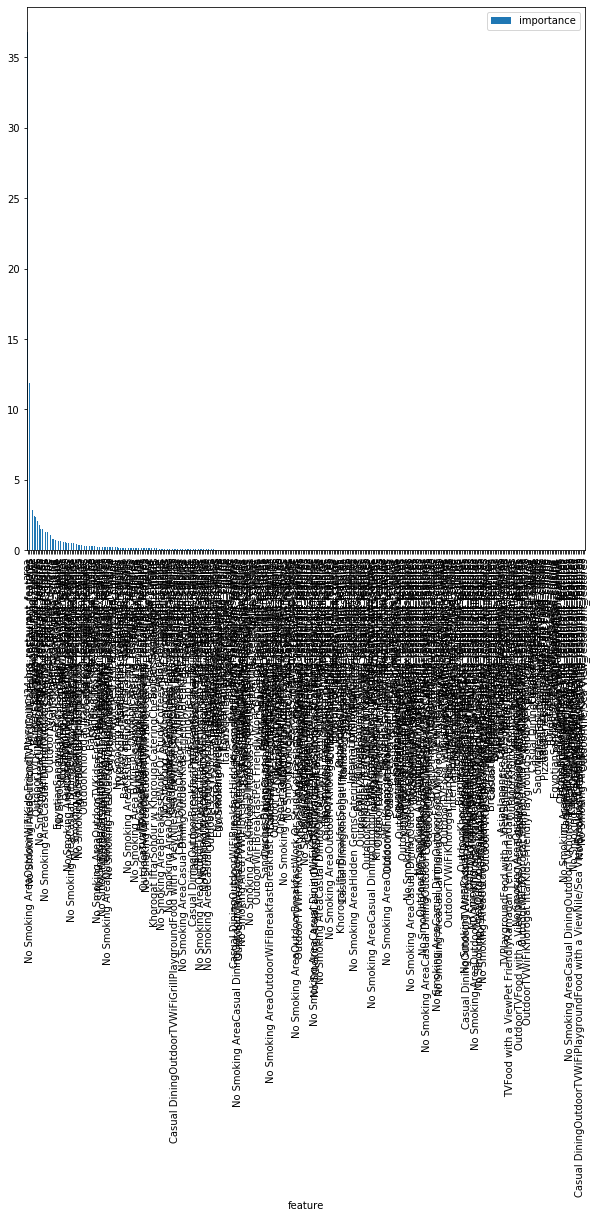

In [0]:
feature_importances =catcls.get_feature_importance()
feature_importances = [(X.columns[i],feature_importances[i])  for  i in range(len(feature_importances)) ]
# importances = cat.get_feature_importance()
 
feature_importances = Sort_Tuple(feature_importances)
df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df.plot(kind='bar', x='feature',figsize=(10,10))
targetted= []
for i in range(250):
    targetted.append(feature_importances[i][0])
    
# feature_importances

In [0]:
f1_score(yp,catcls.predict(xp),average="macro")

0.9952488647418012

In [0]:
catclstest = CatBoostClassifier(random_state=45,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(8)),iterations=6000,learning_rate=0.02562098333966049,early_stopping_rounds=500)
valset = Pool(xp[targetted],yp)
catclstest.fit(xt[targetted],yt,eval_set=valset,verbose=200)

0:	learn: 0.4839541	test: 0.4864696	best: 0.4864696 (0)	total: 23.1ms	remaining: 2m 18s
200:	learn: 0.8465248	test: 0.8464896	best: 0.8464896 (200)	total: 2.8s	remaining: 1m 20s
400:	learn: 0.9223271	test: 0.9225589	best: 0.9225589 (400)	total: 5.38s	remaining: 1m 15s
600:	learn: 0.9566220	test: 0.9568525	best: 0.9568525 (599)	total: 8.02s	remaining: 1m 12s
800:	learn: 0.9672015	test: 0.9682629	best: 0.9685123 (777)	total: 10.6s	remaining: 1m 8s
1000:	learn: 0.9727511	test: 0.9723781	best: 0.9725028 (983)	total: 13.2s	remaining: 1m 6s
1200:	learn: 0.9782798	test: 0.9768051	best: 0.9768051 (1195)	total: 15.8s	remaining: 1m 3s
1400:	learn: 0.9818548	test: 0.9801097	best: 0.9803591 (1393)	total: 18.6s	remaining: 1m 1s
1600:	learn: 0.9832059	test: 0.9819803	best: 0.9824791 (1598)	total: 21.5s	remaining: 59s
1800:	learn: 0.9847024	test: 0.9829779	best: 0.9829779 (1745)	total: 24.7s	remaining: 57.6s
2000:	learn: 0.9854922	test: 0.9836638	best: 0.9838509 (1991)	total: 27.8s	remaining: 55.5s
2

In [0]:
catcls1 = CatBoostClassifier(random_state=45,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(7.793449142228758)),iterations=3400,learning_rate=0.02562098333966049,early_stopping_rounds=500)

catcls2 = CatBoostClassifier(random_state=60,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(8.793449142228758)),iterations=3500,learning_rate=0.03562098333966049,early_stopping_rounds=500)

catcls3 = CatBoostClassifier(random_state=50,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(6.793449142228758)),iterations=3400,learning_rate=0.04562098333966049,early_stopping_rounds=500)

catcls4 = CatBoostClassifier(random_state=30,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.5352337550892011,max_depth=int(round(7.793449142228758)),iterations=3400,learning_rate=0.01562098333966049,early_stopping_rounds=500)


In [0]:
xt1 , xp1,yt1,yp1  = train_test_split(xt,yt,test_size=0.4)

In [0]:
catcls1.fit(xt1,yt1,eval_set=Pool(xp1,yp1),verbose=1000)
catcls2.fit(xt1,yt1,eval_set=Pool(xp1,yp1),verbose=1000)
catcls3.fit(xt1,yt1,eval_set=Pool(xp1,yp1),verbose=1000)
catcls4.fit(xt1,yt1,eval_set=Pool(xp1,yp1),verbose=1000)

ycat1 = catcls1.predict(xp1)
ycat2 = catcls2.predict(xp1)
ycat3 = catcls3.predict(xp1)
ycat4 = catcls4.predict(xp1)

trainstack = pd.DataFrame({"pred1" : ycat1.reshape(-1),"pred2" : ycat2.reshape(-1),"pred3" : ycat3.reshape(-1),"pred4" : ycat4.reshape(-1)})


0:	learn: 0.4839045	test: 0.4814507	best: 0.4814507 (0)	total: 23.7ms	remaining: 1m 20s
1000:	learn: 0.9737587	test: 0.9723579	best: 0.9723579 (997)	total: 16.3s	remaining: 39.2s
2000:	learn: 0.9876328	test: 0.9868025	best: 0.9868025 (1983)	total: 30.7s	remaining: 21.5s
3000:	learn: 0.9902570	test: 0.9890886	best: 0.9894004 (2956)	total: 44.7s	remaining: 5.94s
3399:	learn: 0.9915560	test: 0.9900239	best: 0.9900239 (3232)	total: 50.7s	remaining: 0us
bestTest = 0.9900239011
bestIteration = 3232
Shrink model to first 3233 iterations.
0:	learn: 0.5018577	test: 0.4989089	best: 0.4989089 (0)	total: 24.9ms	remaining: 1m 26s
1000:	learn: 0.9845151	test: 0.9837888	best: 0.9837888 (997)	total: 21.7s	remaining: 54.1s
2000:	learn: 0.9916080	test: 0.9904396	best: 0.9905435 (1998)	total: 41.5s	remaining: 31.1s
bestTest = 0.9905434896
bestIteration = 1998
Shrink model to first 1999 iterations.
0:	learn: 0.4642625	test: 0.4598358	best: 0.4598358 (0)	total: 11.7ms	remaining: 39.6s
1000:	learn: 0.982670

In [0]:
validatestack1 = catcls1.predict(xp)
validatestack2 = catcls2.predict(xp)
validatestack3 = catcls3.predict(xp)
validatestack4 = catcls4.predict(xp)

validatestack= pd.DataFrame({"pred1":validatestack1.reshape(-1),"pred2":validatestack2.reshape(-1),"pred3":validatestack3.reshape(-1),"pred4":validatestack4.reshape(-1)})

In [0]:
lr = LogisticRegression ()

lr.fit(validatestack,yp)

stackpred = lr.predict(trainstack)
f1_score(yp1,stackpred,average="macro")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.10339087546239212

In [0]:
def trainmodel(learning_rate,max_depth,l2_leaf_reg):
#     trainset = Pool(data=X[targetted[:20]].iloc[:2250],label=y.iloc[:2250])
    catstack = CatBoostClassifier(random_state=30,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=l2_leaf_reg,max_depth=int(round(max_depth)),iterations=1000,learning_rate=learning_rate,early_stopping_rounds=500)
    catstack.fit(trainstack,yp1,eval_set=Pool(validatestack,yp),verbose=500)

    preds = catstack.predict(validatestack)
    # onehot = OneHotEncoder()
    # yps = onehot.fit_transform(yp.to_numpy().reshape(-1,1))
    # preds = onehot.transform(np.array(preds).reshape(-1,1))
    return f1_score(yp,preds,average="macro")

bounds = {
    'max_depth':(5,10),
#     'min_rows':(10,30),
    'l2_leaf_reg':(0.3,0.8),
    'learning_rate':(0.001, 0.06),
#     'sample_rate':(0.5,0.8),
    #  'colsample_bylevel': (0.3,1),
    # 'subsample' : (0.6,1)
}
optimizer = BayesianOptimization(
    f=trainmodel,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=5, n_iter=26)

In [0]:
catcls1 = CatBoostClassifier(random_state=45,loss_function="MultiClass",task_type="GPU",eval_metric = "Accuracy",l2_leaf_reg=0.6352337550892011,max_depth=int(round(7.793449142228758)),iterations=3400,learning_rate=0.02562098333966049,early_stopping_rounds=500)
# valset = Pool(xp,yp)
catcls1.fit(X,y,eval_set=valset,verbose=200)

In [0]:
traindata.columns

In [0]:
test = pd.read_csv("./test.csv")
ids = test.Id
test = dataprecleaning(test)
test = dataencoder(test)
test = test[[i for i in traindata.columns if i != "Ratings" ]]

In [0]:
preds = catcls.predict(test)

In [0]:
preds.reshape(-1)

array([5., 4., 3., ..., 2., 1., 3.])

In [0]:
sub = {"Id":ids,"Ratings":preds.reshape(-1)}
sub = pd.DataFrame(sub)
sub.to_csv("sub1catboostsometunning.csv",index=False)